# A demonstration of creating and populating a traversible puzzle network

In [231]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import puzz
import matplotlib.pyplot as plt

## Create a basic network

In [232]:
# initialize the network object with initial abilities a1 and a2
net = puzz.Network(['a1', 'a2'])

# create a few more obstacles and abilities
net.add_obstacle('o1')
net.add_obstacle('o2')
net.add_obstacle('o3')
net.add_obstacle('o4')
net.add_obstacle('o5')

net.add_ability('a3')
net.add_ability('a4')
net.add_ability('a5')

# print all of the node instances
net.nodes

# print the current graph
net.net

{'a1': <puzz.Ability at 0x112242110>,
 'a2': <puzz.Ability at 0x112242150>,
 'a3': <puzz.Ability at 0x10e603a90>,
 'a4': <puzz.Ability at 0x10e603650>,
 'a5': <puzz.Ability at 0x10e603ad0>,
 'o1': <puzz.Node at 0x1119cced0>,
 'o2': <puzz.Node at 0x1119cc2d0>,
 'o3': <puzz.Node at 0x1119cc450>,
 'o4': <puzz.Node at 0x1119cc650>,
 'o5': <puzz.Node at 0x1119cc150>,
 'start': <puzz.Node at 0x112242290>}

{'a1': {'start'}, 'a2': {'start'}, 'start': set()}

In [233]:
# define which abilities defeat which obstacles
# note: a1, a3, and a5 all defeat o1.
net.defeats('a1', 'o1')

net.defeats('a2', 'o2')

net.defeats('a3', 'o3')
net.defeats('a3', 'o1')

net.defeats('a4', 'o4')

net.defeats('a5', 'o5')
net.defeats('a5', 'o1')

net.calc_ability_eclipses()

In [234]:
# check which nodes we can place next in the graph, after a1 and a2
net.enabled_nodes('a1')
net.enabled_nodes('a2')

{'o1', 'o2'}

{'o1', 'o2'}

An obstacle can be placed anywhere as long as the ability to defeat it already exists somewhere in the network. If an ability is already in the network, it is accessible to the player by definition.

## Growing the graph

In [235]:
# place o1 after a1
net.add_connection('a1', 'o1')

# place o2 after a2
net.add_connection('a2', 'o2')

net.net

{'a1': {'start'}, 'a2': {'start'}, 'o1': {'a1'}, 'o2': {'a2'}, 'start': set()}

In [236]:
# desired behavior: a3 and a5 eclipse a1. so you should only be able to
# place them strictly after a1.

# check which nodes we can place after o2
net.enabled_nodes('o2')

# notice that nodes after o1 contain a1 in their past.
# therefore we can place the eclipsed a3 and a5 after o1.
net.enabled_nodes('o1')

{'a4'}

{'a3', 'a4', 'a5'}

Ability a1 **eclipses** ability a2 if a1 can defeat all of the obstacles a2 can defeat. If a1 eclipses a2, then we must ensure that the player aquires a2 first, otherwise a2 serves no purpose. In terms of the directed network, this means that a2 must be somewhere in the path between start and a1: these nodes are guaranteed to have been visited by the time the player gets to a1.

The idea here is that you don't want the player to aquire invincibility before armor, for example.

## Visualize the network

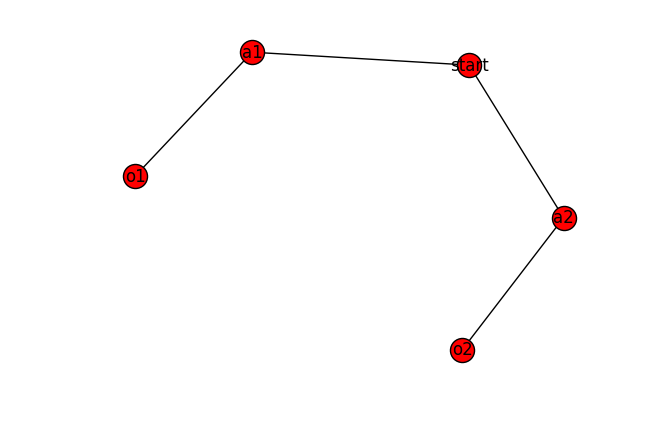

In [237]:
g = net.nxgraph()
nx.draw(g, with_labels=True)
plt.show()